In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl

In [46]:
df = pd.read_csv('oceanographic and meteorological dataset.csv')
df.shape
df.head(5)

,time,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5,uo_cop,vo_cop,swh_cop,mwp_cop,mwd_cop,peak_period_cop
0,2025-01-01 00:00:00,-6.306534,14.981308,172.33765,8.959626,4.751488,10.330421,0.019531,0.160156,5.10,7.56,175.07,10.85
1,2025-01-01 01:00:00,-4.723419,14.342773,171.36377,8.907424,4.758851,10.286964,0.026367,0.164062,NaN,NaN,NaN,NaN
2,2025-01-01 02:00:00,-3.978439,12.770416,171.11426,8.913869,4.665862,10.272316,0.038086,0.162109,NaN,NaN,NaN,NaN
3,2025-01-01 03:00:00,-3.164124,15.130005,171.06311,8.911307,4.565788,10.260597,0.053711,0.155273,5.03,7.60,174.16,10.71
4,2025-01-01 04:00:00,-3.343689,12.074799,171.16702,8.862277,4.541395,10.223000,0.070312,0.143555,NaN,NaN,NaN,NaN


In [47]:
df['time'] = pd.to_datetime(df['time']) 

df['hour_sin'] = np.sin(2 * np.pi * df['time'].dt.hour / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['time'].dt.hour / 24)
df['month_sin'] = np.sin(2 * np.pi * df['time'].dt.month / 12)
df['month_cos'] = np.cos(2 * np.pi * df['time'].dt.month / 12)

# 2. Definir X e y (Removendo a coluna de tempo original também)
colunas_para_remover = [
    'uo_cop', 'vo_cop', 'swh_cop', 'mwd_cop', 
    'mwp_cop', 'peak_period_cop',  'time','swh_era5'
]
X = df.drop(columns=colunas_para_remover, errors='ignore')
y = df['swh_era5']
X.describe()

,u10_era5,v10_era5,mwd_era5,mwp_era5,pp1d_era5,hour_sin,hour_cos,month_sin,month_cos
count,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7.993000e+03,7.993000e+03,7.993000e+03,7.993000e+03
mean,2.188604,-0.618673,254.533087,8.491293,10.429202,-1.711241e-17,1.251095e-04,-4.458706e-03,-9.817380e-02
std,5.049941,5.654880,101.285307,1.508553,2.219554,7.071068e-01,7.071952e-01,7.382794e-01,6.673901e-01
min,-10.217163,-17.162354,0.005922,5.044391,4.360695,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,-1.410156,-4.420624,247.110920,7.368544,8.810890,-7.071068e-01,-7.071068e-01,-8.660254e-01,-8.660254e-01
50%,2.046631,-1.186233,291.861820,8.303400,10.276711,0.000000e+00,6.123234e-17,1.224647e-16,-1.836970e-16
75%,5.630310,3.352921,320.586180,9.305229,11.903175,7.071068e-01,7.071068e-01,8.660254e-01,5.000000e-01
max,21.640991,17.548920,359.915250,14.556703,19.234710,1.000000e+00,1.000000e+00,1.000000e+00,8.660254e-01


In [48]:
from sklearn.model_selection import train_test_split

seed = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [49]:
import itertools
#from sklearn.linear_model import LinearRegression
#from sklearn.metrics import r2_score
import statsmodels.api as sm

subset_selection_model_results = pd.DataFrame(columns=["k", "features", "r2", "rss", "adjr2", 'aic', 'bic'])
count = 0
ranges = [1,2,3,4,5,6,7,8,9]

#for k in range(1,k+1):
for k in ranges:
    print('Iterating for {} features.'.format(k))
    for combo in itertools.combinations(X_train.columns, k):
        iter_X = X_train[list(combo)]
        model = sm.OLS(y_train,sm.add_constant(iter_X)).fit()
        
#        y_pred = regr.predict(iter_X)
        iter_vals = [
            k, 
            ', '.join(combo),
            model.rsquared,      # r2
            sum(model.resid**2), # rss
            model.rsquared_adj,  # adjr2
            model.aic,           # aic
            model.bic            # bic
        ]
        subset_selection_model_results.loc[count] = pd.DataFrame(
            [iter_vals],
            columns = ["k", "features", "r2", "rss", "adjr2", 'aic', 'bic']
        ).iloc[0,]
        count += 1
    
subset_selection_model_results.sort_values(by='bic').head(20)

Iterating for 1 features.
Iterating for 2 features.
Iterating for 3 features.
Iterating for 4 features.
Iterating for 5 features.
Iterating for 6 features.
Iterating for 7 features.
Iterating for 8 features.
Iterating for 9 features.


,k,features,r2,rss,adjr2,aic,bic
470,7,"u10_era5, v10_era5, mwd_era5, mwp_era5, pp1d_e...",0.705484,3211.936653,0.705161,13759.206627,13813.31155
503,8,"u10_era5, v10_era5, mwd_era5, mwp_era5, pp1d_e...",0.705532,3211.407154,0.705163,13760.152468,13821.020506
504,8,"u10_era5, v10_era5, mwd_era5, mwp_era5, pp1d_e...",0.705496,3211.804678,0.705127,13760.943899,13821.811937
510,9,"u10_era5, v10_era5, mwd_era5, mwp_era5, pp1d_e...",0.705545,3211.2712,0.70513,13761.881774,13829.512927
390,6,"u10_era5, v10_era5, mwd_era5, mwp_era5, month_...",0.699818,3273.730601,0.699536,13879.051441,13926.393248
473,7,"u10_era5, v10_era5, mwd_era5, mwp_era5, hour_s...",0.699861,3273.253111,0.699532,13880.118776,13934.223699
474,7,"u10_era5, v10_era5, mwd_era5, mwp_era5, hour_c...",0.699842,3273.460427,0.699513,13880.523736,13934.628658
505,8,"u10_era5, v10_era5, mwd_era5, mwp_era5, hour_s...",0.699887,3272.977472,0.699511,13881.580318,13942.448356
406,6,"u10_era5, v10_era5, mwp_era5, pp1d_era5, month...",0.686076,3423.594494,0.685781,14165.252185,14212.593993
482,7,"u10_era5, v10_era5, mwp_era5, pp1d_era5, hour_...",0.686132,3422.984068,0.685788,14166.112035,14220.216957


In [50]:
features = [ 'u10_era5', 'v10_era5',    # Ventos (f)
    'mwd_era5',     # Propriedades de ondas (f+t)
    'mwp_era5', 'pp1d_era5'
]
iter_X = X_train[features].values
model = sm.OLS(y_train,sm.add_constant(iter_X)).fit()

iter_vals = [
    len(features), 
    ', '.join(features),
    model.rsquared,      # r2
    sum(model.resid**2), # rss
    model.rsquared_adj,  # adjr2
    model.aic,           # aic
    model.bic            # bic
]
subset_selection_model_results.loc[count] = pd.DataFrame(
    [iter_vals],
    columns = ["k", "features", "r2", "rss", "adjr2", 'aic', 'bic']
).iloc[0,]


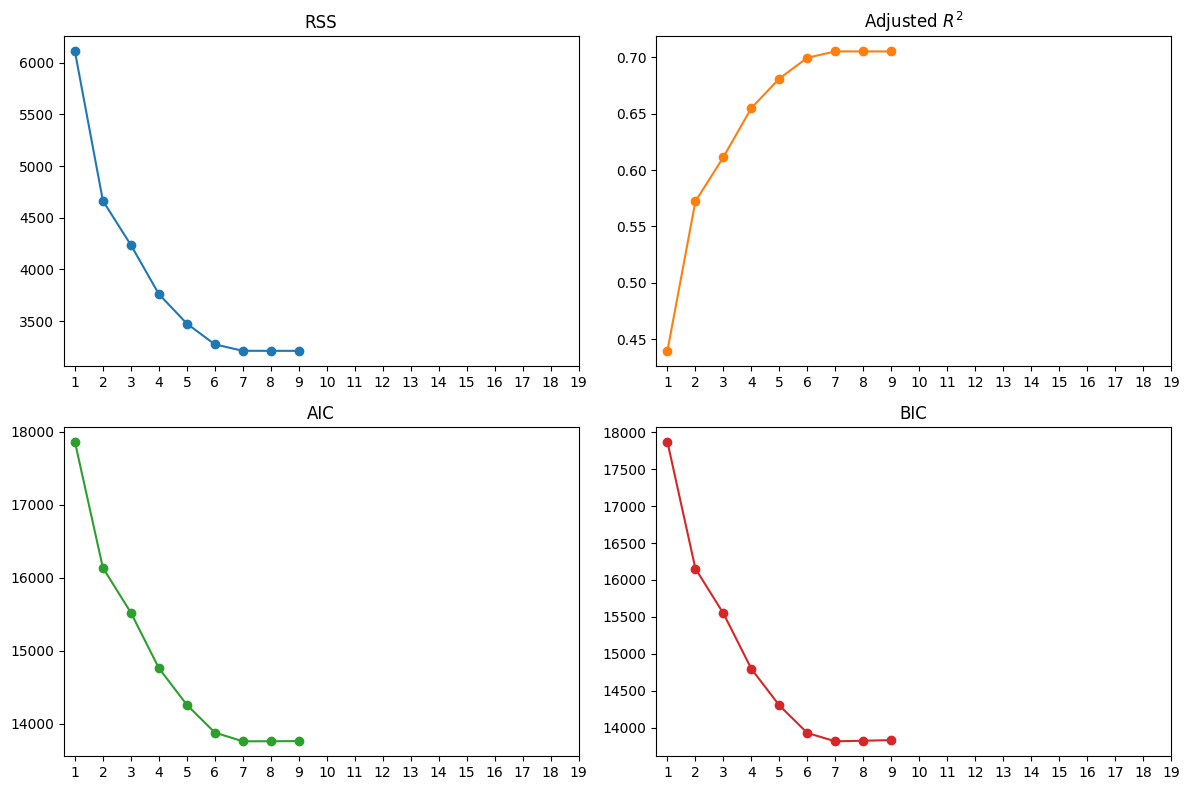

In [51]:
best_subset_selection_models = subset_selection_model_results.iloc[subset_selection_model_results.groupby('k').idxmax()['r2'].values].copy().sort_values('k')

fig, axs = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)
axs[0, 0].plot(best_subset_selection_models.k, best_subset_selection_models.rss, '-o', color='tab:blue')
axs[0, 0].set_title('RSS')
axs[0, 1].plot(best_subset_selection_models.k, best_subset_selection_models.adjr2, '-o', color='tab:orange')
axs[0, 1].set_title('Adjusted $R^2$')
axs[1, 0].plot(best_subset_selection_models.k, best_subset_selection_models.aic, '-o', color='tab:green')
axs[1, 0].set_title('AIC')
axs[1, 1].plot(best_subset_selection_models.k, best_subset_selection_models.bic, '-o', color='tab:red')
axs[1, 1].set_title('BIC')

for ax in axs.flat:
    ax.set_xticks(range(1, 20))

In [52]:
forward_selection_model_results = pd.DataFrame(columns=['k', "features", "r2", "rss", "adjr2", 'aic', 'bic'])

predictors = []

for k in range(1, X.shape[1] + 1):
    print('Iterating for {}/{} features.'.format(k, X.shape[1]))
    remaining_predictors = [p for p in X.columns if p not in predictors]
    forward_selection_model_results_iter = pd.DataFrame(columns=['feature_single', "features", "r2", "rss", "adjr2", 'aic', 'bic'])
    count = 0
    for p in remaining_predictors:
        combo = predictors + [p]
        iter_X = X_train[combo].values
        model = sm.OLS(y_train, sm.add_constant(iter_X)).fit()

        iter_vals = [
            p,
            ', '.join(combo),
            model.rsquared,      # r2
            sum(model.resid**2), # rss
            model.rsquared_adj,  # adjr2
            model.aic,           # aic
            model.bic            # bic
        ]
        forward_selection_model_results_iter.loc[count] = pd.DataFrame(
            [iter_vals],
            columns = ['feature_single', "features", "r2", "rss", "adjr2", 'aic', 'bic']
        ).iloc[0,]
        count += 1

    predictors.append(forward_selection_model_results_iter.loc[forward_selection_model_results_iter['r2'].argmax()]['feature_single'])
    
    forward_selection_model_results_iter = forward_selection_model_results_iter.rename(columns={"feature_single": "k"})
    forward_selection_model_results_iter['k'] = k
    forward_selection_model_results = pd.concat([forward_selection_model_results, forward_selection_model_results_iter], ignore_index=True)
    
forward_selection_model_results

Iterating for 1/9 features.
Iterating for 2/9 features.
Iterating for 3/9 features.
Iterating for 4/9 features.
Iterating for 5/9 features.
Iterating for 6/9 features.
Iterating for 7/9 features.
Iterating for 8/9 features.
Iterating for 9/9 features.


,k,features,r2,rss,adjr2,aic,bic
0,1,u10_era5,0.289339,7750.325275,0.289228,19379.430196,19392.956426
1,1,v10_era5,0.00315,10871.448097,0.002994,21543.192395,21556.718626
2,1,mwd_era5,0.02915,10587.901811,0.028998,21374.212395,21387.738626
3,1,mwp_era5,0.439733,6110.16413,0.439645,17859.057343,17872.583574
4,1,pp1d_era5,0.263616,8030.86229,0.263501,19606.782244,19620.308475
5,1,hour_sin,0.000006,10905.735631,-0.00015,21563.326741,21576.852972
6,1,hour_cos,0.000065,10905.097893,-0.000092,21562.952826,21576.479057
7,1,month_sin,0.186446,8872.455878,0.186319,20244.006538,20257.532769
8,1,month_cos,0.269417,7967.596343,0.269303,19556.211801,19569.738032
9,2,"mwp_era5, u10_era5",0.572327,4664.115944,0.572193,16134.32358,16154.612926


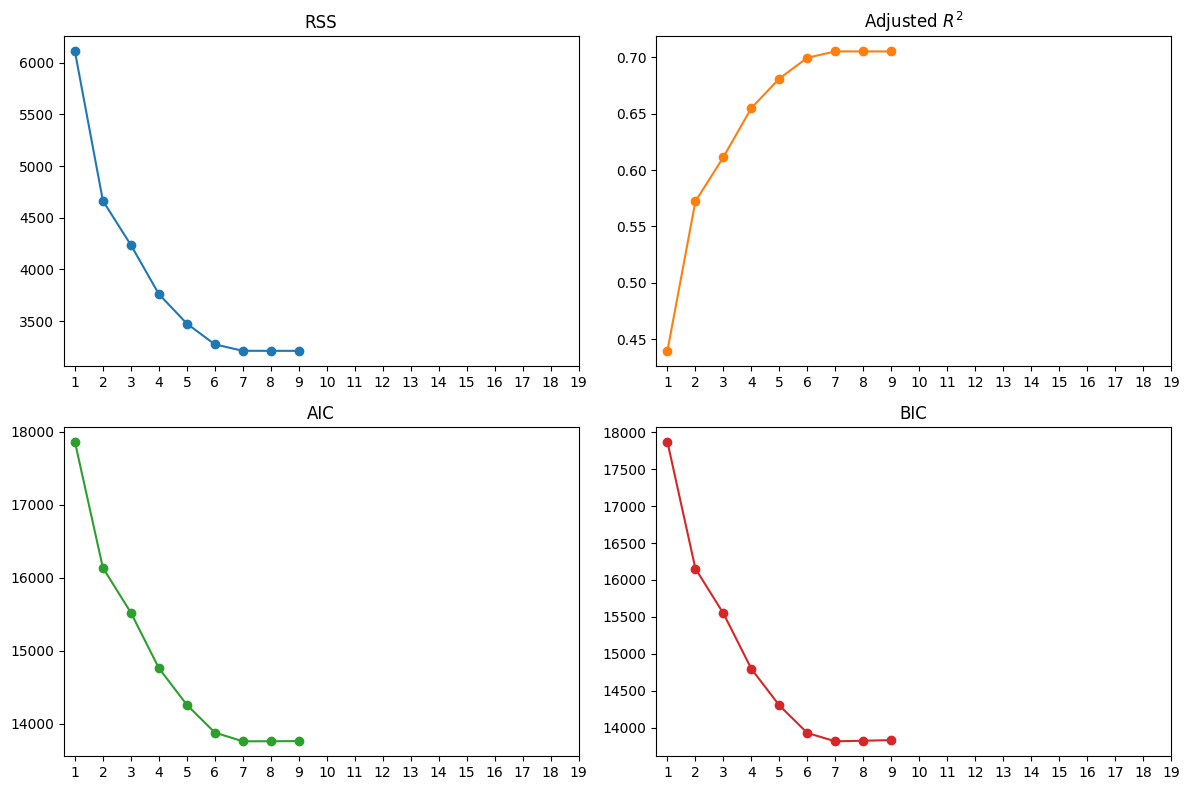

In [53]:
best_forward_selection_models = forward_selection_model_results.iloc[forward_selection_model_results.groupby('k').idxmax()['r2'].values].copy().sort_values('k')

fig, axs = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)
axs[0, 0].plot(best_forward_selection_models.k, best_forward_selection_models.rss, '-o', color='tab:blue')
axs[0, 0].set_title('RSS')
axs[0, 1].plot(best_forward_selection_models.k, best_forward_selection_models.adjr2, '-o', color='tab:orange')
axs[0, 1].set_title('Adjusted $R^2$')
axs[1, 0].plot(best_forward_selection_models.k, best_forward_selection_models.aic, '-o', color='tab:green')
axs[1, 0].set_title('AIC')
axs[1, 1].plot(best_forward_selection_models.k, best_forward_selection_models.bic, '-o', color='tab:red')
axs[1, 1].set_title('BIC')

for ax in axs.flat:
    ax.set_xticks(range(1, 20))

Ridge

The value for alpha with the lowest 10-Fold cross-validation MSE is: 2.656e+00 with a MSE of 5.037e-01


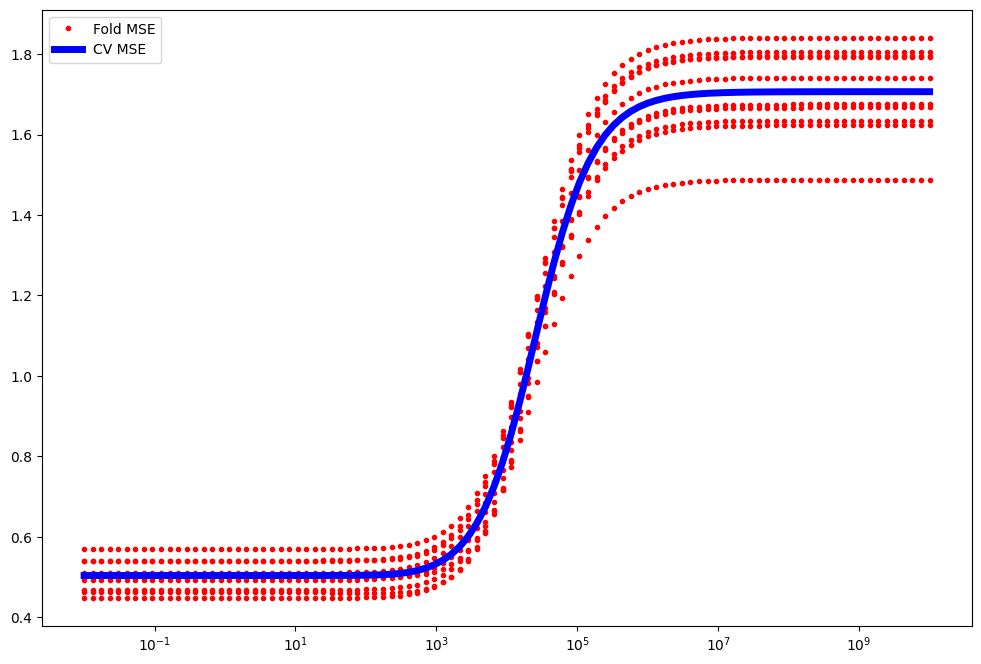

In [54]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# K-Fold Cross Validation
kf = KFold(n_splits=10, random_state=seed, shuffle=True)

ridge_kfold_mse = pd.DataFrame(columns=['alpha', 'mse'])
alphas = [10**i for i in np.linspace(start = -2, stop = 10, num = 100)]
count = 0
iter_count = 1


for alpha in alphas:
    for train_idxs, val_idxs in kf.split(X_train):
        # Get the training and test data for the fold
        X_fold_train = X_train.values[train_idxs]
        X_fold_val = X_train.values[val_idxs]
        y_fold_train = y_train.values[train_idxs]
        y_fold_val = y_train.values[val_idxs]
        
        # Create model
        model = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
        #model = Ridge(alpha=alpha)
        #scaler = StandardScaler()
        #scaler.fit(X_fold_train)
        #X_fold_train_transformed = scaler.transform(X_fold_train)
        #model = Ridge(alpha=alpha)
        #model.fit(X_fold_train_transformed)

        # Train model
        model.fit(X_fold_train, y_fold_train)
        # Predict on validation data
        y_pred = model.predict(X_fold_val)
        # Store validation mean squared error 
        mse = metrics.mean_squared_error(y_pred, y_fold_val)
        ridge_kfold_mse.loc[count] = [alpha, mse]
        count += 1

ridge_kfold_mse_mean = ridge_kfold_mse.copy()
ridge_kfold_mse_mean = ridge_kfold_mse_mean.groupby("alpha").mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ridge_kfold_mse.alpha, ridge_kfold_mse.mse, 'r.', label = 'Fold MSE')
ax.plot(ridge_kfold_mse_mean.alpha, ridge_kfold_mse_mean.mse, 'b', linewidth=5.0, label = 'CV MSE')
ax.set_xscale('log')
ax.legend()

min_alpha_ridge = ridge_kfold_mse_mean.loc[ridge_kfold_mse_mean['mse'].idxmin()]['alpha']
print(f"The value for alpha with the lowest 10-Fold cross-validation MSE is: {min_alpha_ridge:.3e} with a MSE of {ridge_kfold_mse_mean['mse'].min():.3e}")

The value for alpha with the lowest 10-Fold cross-validation MSE is: 1.000e-02 with a MSE of 5.053e-01


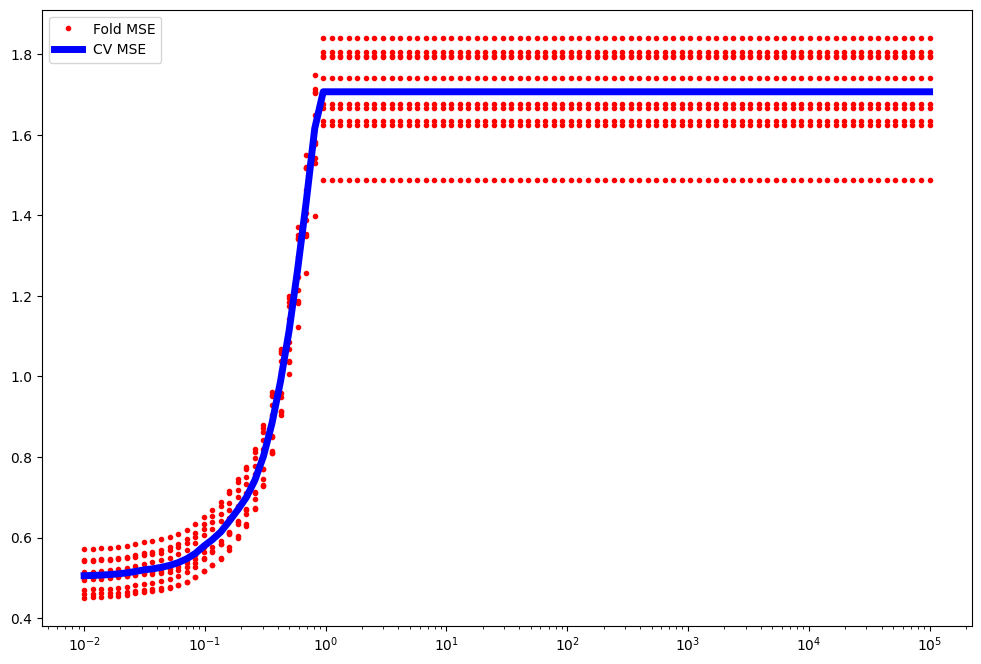

In [55]:
from sklearn.linear_model import Lasso

# K-Fold Cross Validation
kf = KFold(n_splits=10, random_state=seed, shuffle=True)

lasso_kfold_mse = pd.DataFrame(columns=['alpha', 'mse'])
alphas = [10**i for i in np.linspace(start = -2, stop = 5, num = 100).tolist()]
count = 0
iter_count = 1

for alpha in alphas:
    for train_idxs, val_idxs in kf.split(X_train):
        # Get the training and test data for the fold
        X_fold_train = X_train.values[train_idxs]
        X_fold_val = X_train.values[val_idxs]
        y_fold_train = y_train.values[train_idxs]
        y_fold_val = y_train.values[val_idxs]
        
        # Create model
        model = make_pipeline(StandardScaler(), Lasso(alpha=alpha, max_iter=10000))
        #model = Lasso(alpha=alpha, max_iter=10000)
        
        # Train model
        model.fit(X_fold_train, y_fold_train)
        # Predict on validation data
        y_pred = model.predict(X_fold_val)
        # Store validation mean squared error 
        mse = metrics.mean_squared_error(y_pred, y_fold_val)
        lasso_kfold_mse.loc[count] = [alpha, mse]
        count += 1

lasso_kfold_mse_mean = lasso_kfold_mse.copy()
lasso_kfold_mse_mean = lasso_kfold_mse_mean.groupby("alpha").mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(lasso_kfold_mse.alpha, lasso_kfold_mse.mse, 'r.', label = 'Fold MSE')
ax.plot(lasso_kfold_mse_mean.alpha, lasso_kfold_mse_mean.mse, 'b', linewidth=5.0, label = 'CV MSE')
ax.set_xscale('log')
ax.legend()

min_alpha_lasso = lasso_kfold_mse_mean.loc[lasso_kfold_mse_mean['mse'].idxmin()]['alpha']
print(f"The value for alpha with the lowest 10-Fold cross-validation MSE is: {min_alpha_lasso:.3e} with a MSE of {lasso_kfold_mse_mean['mse'].min():.3e}")

In [56]:
from sklearn.linear_model import LinearRegression

# Subset Selection
subset_selection_features = best_subset_selection_models.loc[best_subset_selection_models['bic'].idxmin()]['features'].split(', ')
subset_selection_model = LinearRegression()

# Forward Stepwise Selection
forward_selection_features = best_forward_selection_models.loc[best_forward_selection_models['bic'].idxmin()]['features'].split(', ')
forward_selection_model = LinearRegression()

# Ridge
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=min_alpha_ridge))
ridge_features = X_train.columns

# Lasso
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=min_alpha_lasso, max_iter=10000))
lasso_features = X_train.columns

best_model_names = ['Subset Selection', 'Forward Stepwise Selection', 'Ridge', 'Lasso']
best_models = [subset_selection_model, forward_selection_model, ridge_model, lasso_model]
best_features = [subset_selection_features, forward_selection_features, ridge_features, lasso_features]

best_model_results_df = pd.DataFrame(columns=['mse', 'r2'], index=best_model_names)
for model_name, model, features in zip(best_model_names, best_models, best_features):
    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_test[features])
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    best_model_results_df.loc[model_name] = [mse, r2]

best_model_results_df

,mse,r2
Subset Selection,0.47906,0.687593
Forward Stepwise Selection,0.47906,0.687593
Ridge,0.479089,0.687575
Lasso,0.47706,0.688898


The best subset selection model is with 7 features: ['month_cos', 'month_sin', 'mwd_era5', 'mwp_era5', 'pp1d_era5', 'u10_era5', 'v10_era5']
The best forward selection model is with 7 features: ['month_cos', 'month_sin', 'mwd_era5', 'mwp_era5', 'pp1d_era5', 'u10_era5', 'v10_era5']


Text(0, 0.5, '')

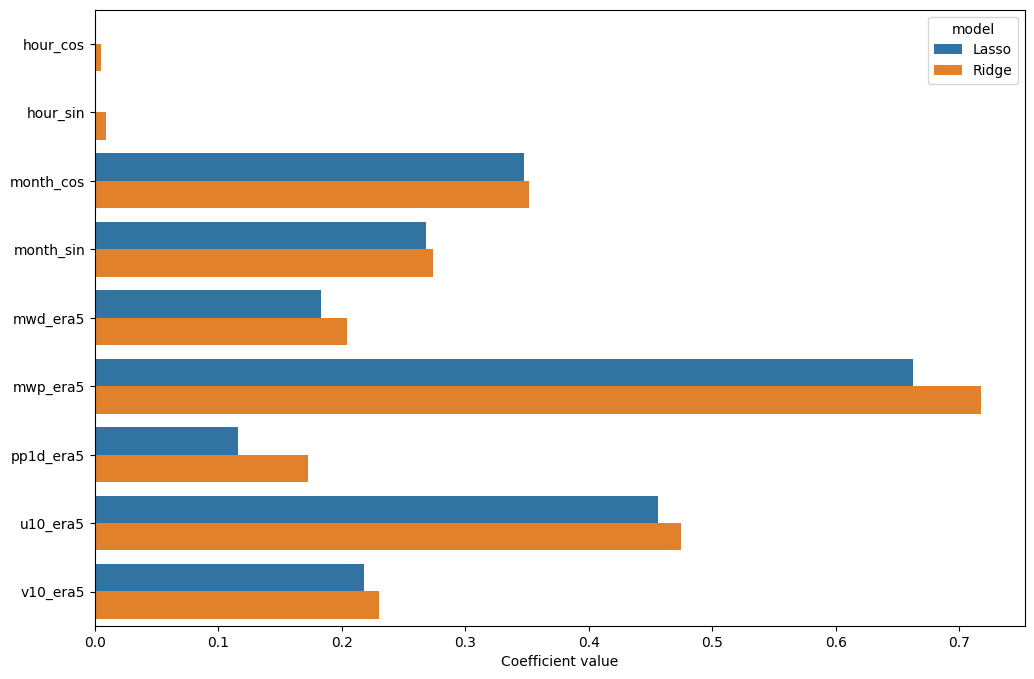

In [57]:
print(f'The best subset selection model is with {len(subset_selection_features)} features: {sorted(subset_selection_features)}')
print(f'The best forward selection model is with {len(forward_selection_features)} features: {sorted(forward_selection_features)}')

model_coefs_df = pd.DataFrame(columns=['feature', 'coef', 'model'])
for model, features, name in zip(best_models, best_features, best_model_names):
    if name in ['Ridge', 'Lasso']:


        
        coefs = abs(model.steps[1][1].coef_)
    else:
        continue
    for coef in zip(features, coefs):
        model_coefs_df.loc[len(model_coefs_df)] = [coef[0], coef[1], name]
model_coefs_df.sort_values(by='feature', inplace=True)
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(data=model_coefs_df, x='coef', y='feature', hue='model')
ax.set_xlabel('Coefficient value')
ax.set_ylabel('')